In [1]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mediapipe

In [3]:
import os
import cv2
import pandas as pd
import numpy as np
import splitfolders
import shutil
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.regularizers import l2

In [4]:
dataset_path = "/kaggle/input/asl-dataset/asl_dataset/asl_dataset" 
output_path = "/kaggle/working/"
IMG_SIZE = (64, 64)  

In [5]:
# Fonction pour charger les données
def load_data(dataset_path):
    images = []
    labels = []
    
    # Parcourir les dossiers
    for label in os.listdir(dataset_path):
        label_path = os.path.join(dataset_path, label)
        
        if os.path.isdir(label_path):  # Vérifiez que c'est un dossier
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                
                # Charger et prétraiter l'image
                img = load_img(img_path, target_size=IMG_SIZE)  # Redimensionner
                img_array = img_to_array(img) / 255.0  # Normaliser les pixels entre 0 et 1
                
                images.append(img_array)
                labels.append(label)
    
    return np.array(images), np.array(labels)

X, y = load_data(dataset_path)

# Encoder les labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Convertir les classes en entiers
print(f"Classes trouvées : {label_encoder.classes_}")



Classes trouvées : ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h'
 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r' 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']


Classe 0: 70 images


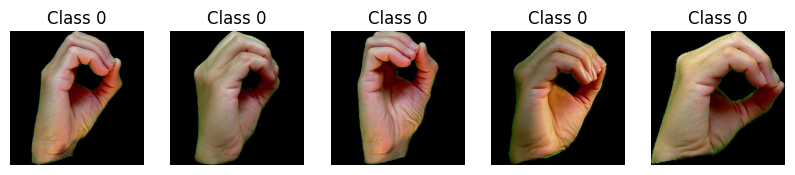

Classe 1: 70 images


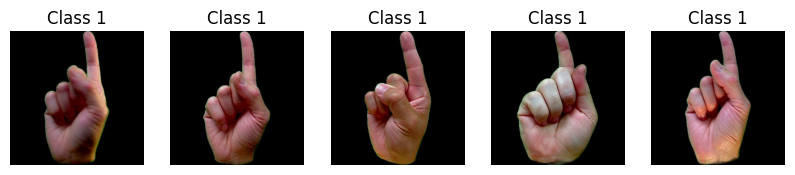

Classe 2: 70 images


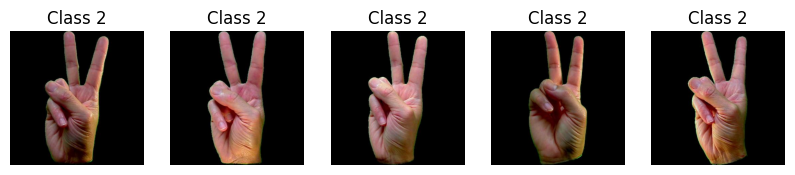

Classe 3: 70 images


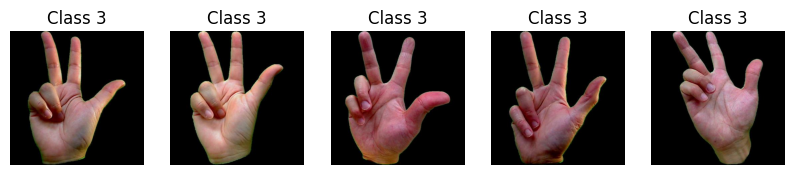

Classe 4: 70 images


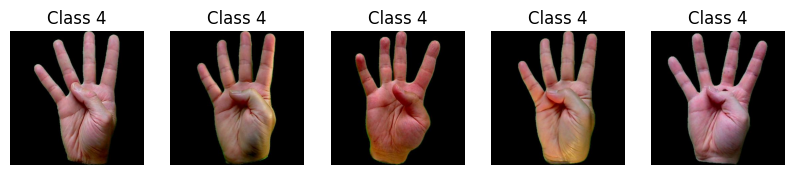

Classe 5: 70 images


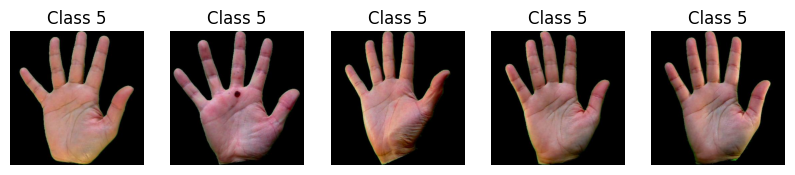

Classe 6: 70 images


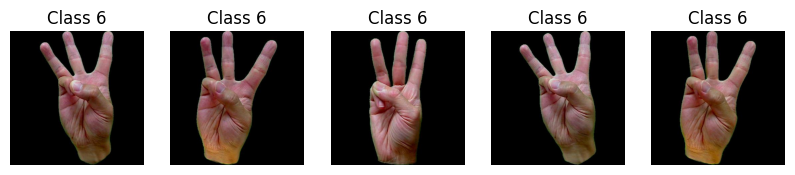

Classe 7: 70 images


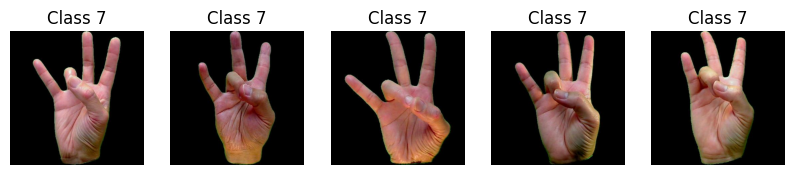

Classe 8: 70 images


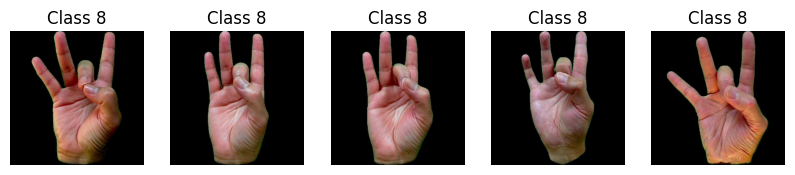

Classe 9: 70 images


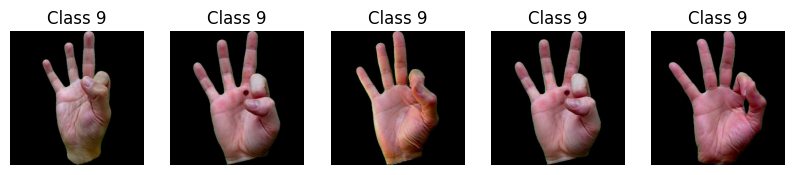

In [8]:
# Liste des classes (A-Z et 0-9)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

# Fonction pour afficher le jeu de données
def display_dataset_info(dataset_path, class_names):
    # Parcourir les classes
    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        if os.path.exists(class_path):
            # Récupérer les images dans chaque classe
            images = os.listdir(class_path)
            print(f"Classe {class_name}: {len(images)} images")
            
            # Afficher quelques exemples d'images pour chaque classe
            plt.figure(figsize=(10, 10))
            for i, img_file in enumerate(images[:5]):  # Afficher 5 images d'exemple
                img_path = os.path.join(class_path, img_file)
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir BGR à RGB pour l'affichage avec Matplotlib
                
                plt.subplot(1, 5, i+1)
                plt.imshow(img)
                plt.axis('off')
                plt.title(f"Class {class_name}")
                
            plt.show()

# Afficher les classes et les images d'exemple
display_dataset_info(dataset_path, class_names)


In [9]:
base_path = "/kaggle/input/asl-dataset/asl_dataset/asl_dataset"
output_path = "/kaggle/working/"

# Diviser le dataset en train, validation et test
splitfolders.ratio(base_path, output=output_path, seed=1333, ratio=(0.8, 0.1, 0.1))

# Chemins pour les répertoires après la division
train_folder = os.path.join(output_path, 'train', 'asl_dataset')
val_folder = os.path.join(output_path, 'val', 'asl_dataset')
test_folder = os.path.join(output_path, 'test', 'asl_dataset')

# Suppression des répertoires si ils existent
for folder in [train_folder, val_folder, test_folder]:
    if os.path.exists(folder):
        shutil.rmtree(folder)

# Paramètres hyperparamétriques
batch_size = 32
image_size = 64
img_channels = 3

# Générateur de données avec augmentation pour l'entraînement
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Générateur de données pour la validation et les tests (sans augmentation)
val_test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_path = os.path.join(output_path, 'train')
val_path = os.path.join(output_path, 'val')
test_path = os.path.join(output_path, 'test')

train_data = train_datagen.flow_from_directory(directory=train_path, 
                                               target_size=(image_size, image_size), 
                                               batch_size=batch_size, 
                                               class_mode='categorical')

val_data = val_test_datagen.flow_from_directory(directory=val_path, 
                                                target_size=(image_size, image_size), 
                                                batch_size=batch_size, 
                                                class_mode='categorical')

test_data = val_test_datagen.flow_from_directory(directory=test_path, 
                                                 target_size=(image_size, image_size), 
                                                 batch_size=batch_size, 
                                                 class_mode='categorical', 
                                                 shuffle=False)


Copying files: 2515 files [00:03, 643.90 files/s]


Found 2012 images belonging to 36 classes.
Found 251 images belonging to 36 classes.
Found 252 images belonging to 36 classes.


In [10]:
model = Sequential()

# Block 1
model.add(Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=l2(0.001),
                 input_shape=(image_size, image_size, img_channels)))
model.add(Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.1))

# Block 2
model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.1))

# Block 3
model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling2D(padding='same'))
model.add(Dropout(0.1))

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))

# Output layer
model.add(Dense(36, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │              

 Total params: 2,404,100 (9.17 MB)

 Trainable params: 2,403,652 (9.17 MB)

 Non-trainable params: 448 (1.75 KB)

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

early_stoping = EarlyStopping(monitor='val_loss', 
                              min_delta=0.001,
                              patience= 5,
                              restore_best_weights= True, 
                              verbose = 0)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy', 
                                         patience = 2, 
                                         factor=0.5 , 
                                         verbose = 1)

In [13]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [15]:
asl_class = model.fit(train_data, 
                      validation_data= val_data, 
                      epochs=50, 
                      callbacks=[early_stoping,reduce_learning_rate],
                      verbose = 1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 27s 236ms/step - accuracy: 0.0311 - loss: 12.6930 - val_accuracy: 0.0279 - val_loss: 17.5983 - learning_rate: 0.0010
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.0544 - loss: 8.7251 - val_accuracy: 0.0279 - val_loss: 19.2303 - learning_rate: 0.0010
Epoch 3/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.0591 - loss: 6.6686
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.0593 - loss: 6.6576 - val_accuracy: 0.0279 - val_loss: 11.6728 - learning_rate: 0.0010
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.0760 - loss: 5.4619 - val_accuracy: 0.0279 - val_loss: 9.7970 - learning_rate: 5.0000e-04
Epoch 5/50
62/63 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0974 - loss: 4.9275
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.0978 - loss: 4.9242 - val_accura

In [16]:
# Evaluvate for train generator
loss,acc = model.evaluate(train_data , verbose = 1)

print('The accuracy of the model for training data is:',acc*100)
print('The Loss of the model for training data is:',loss)

# Evaluvate for validation generator
loss,acc = model.evaluate(val_data, verbose = 1)

print('The accuracy of the model for validation data is:',acc*100)
print('The Loss of the model for validation data is:',loss)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.8403 - loss: 1.3905
The accuracy of the model for training data is: 85.98409295082092
The Loss of the model for training data is: 1.3617863655090332
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9106 - loss: 1.1816
The accuracy of the model for validation data is: 90.83665609359741
The Loss of the model for validation data is: 1.183237910270691


In [17]:
#save model
model.save('model1.h5')

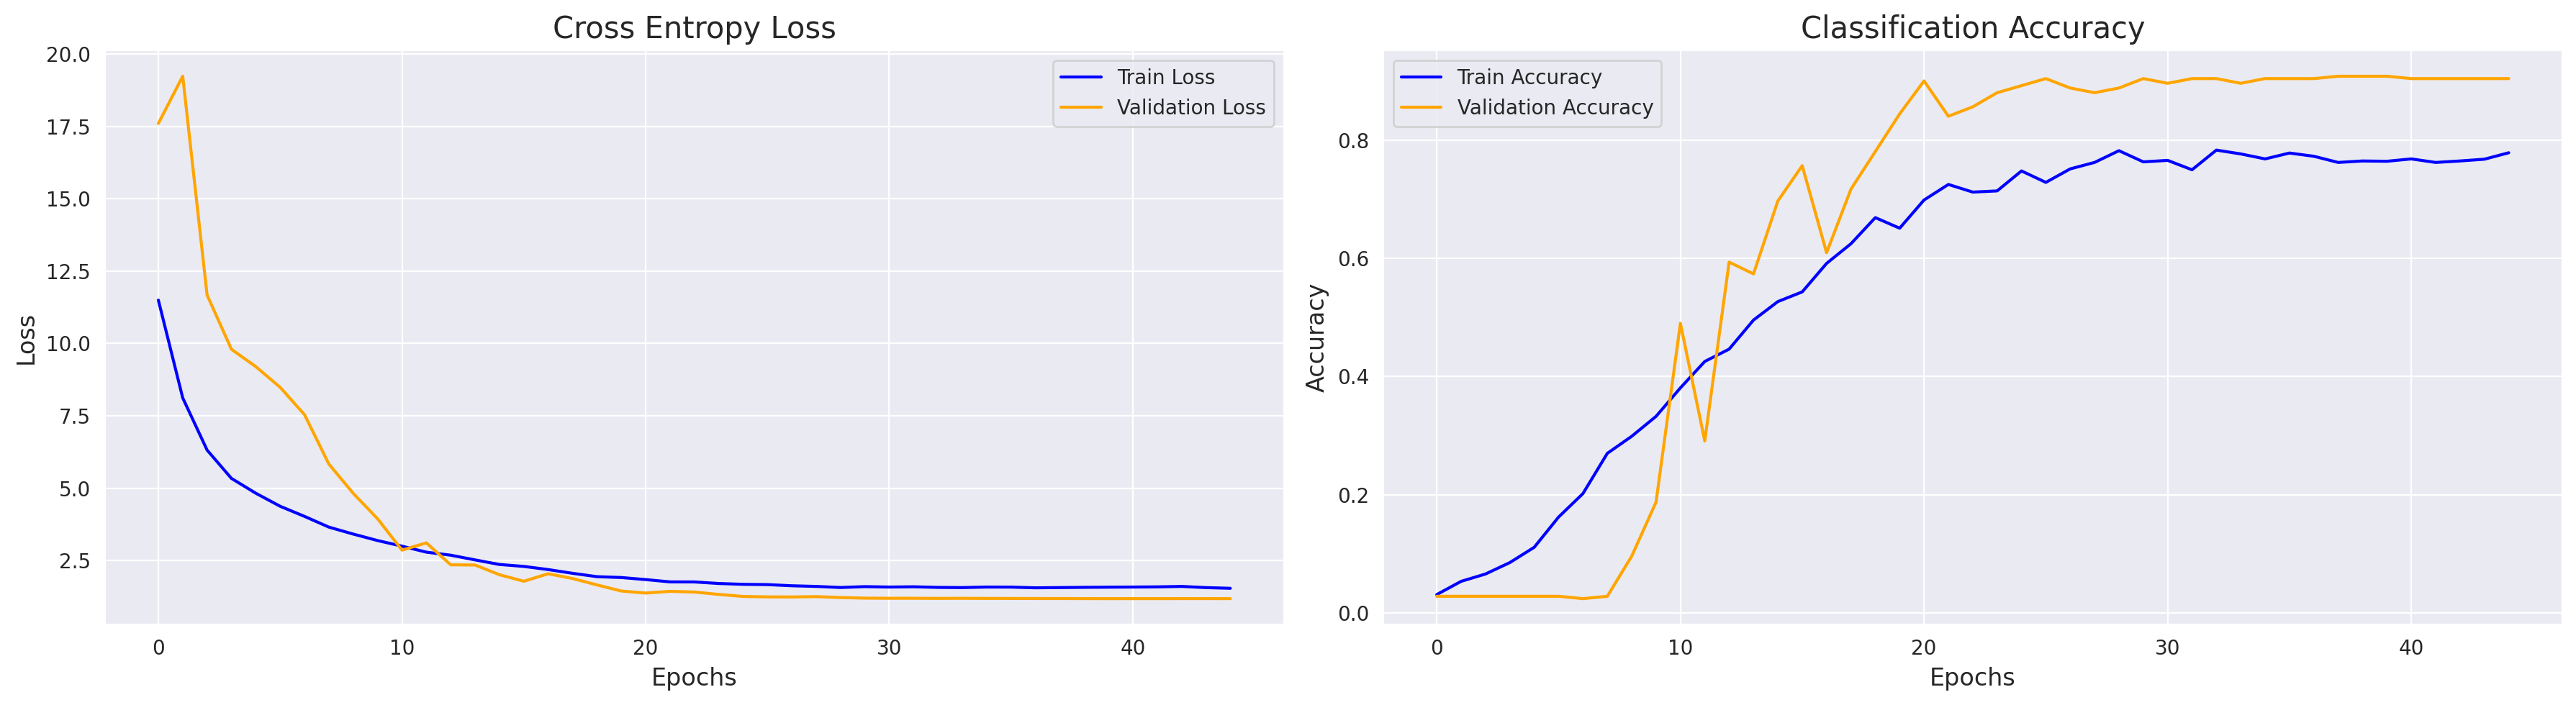

In [18]:
# Conversion en DataFrame
error = pd.DataFrame(asl_class.history)
# Configuration de la figure
plt.figure(figsize=(18, 5), dpi=200)
sns.set_style('darkgrid')

# Tracer la courbe de perte (Loss)
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(error['loss'], label='Train Loss', color='blue')
plt.plot(error['val_loss'], label='Validation Loss', color='orange')
plt.legend(fontsize=10)

# Tracer la courbe de précision (Accuracy)
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(error['accuracy'], label='Train Accuracy', color='blue')
plt.plot(error['val_accuracy'], label='Validation Accuracy', color='orange')
plt.legend(fontsize=10)

# Affichage des graphiques
plt.tight_layout()
plt.show()


In [84]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Charger le modèle ResNet50, exclure les couches supérieures
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, img_channels))

# Geler uniquement les premières couches
for layer in base_model.layers[:100]:  # Geler moins de couches
    layer.trainable = False

# Ajouter des couches personnalisées au modèle
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Couches de moyenne globale
x = Dense(256, activation='relu')(x)  # Couches entièrement connectées
x = Dropout(0.5)(x)  # Couches de régularisation (Dropout)
predictions = Dense(len(class_names), activation='softmax')(x)  # Couches de sortie

# Créer le modèle final
model1 = Model(inputs=base_model.input, outputs=predictions)

# Afficher le résumé du modèle
model1.summary()

Model: "functional_73"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_24            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_24[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 24,121,508 (92.02 MB)

 Trainable params: 19,986,724 (76.24 MB)

 Non-trainable params: 4,134,784 (15.77 MB)

In [85]:
# Compiler le modèle avec un taux d'apprentissage plus bas
optimizer = Adam(learning_rate=0.0001)  # Taux d'apprentissage plus bas
model1.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0.001,
                               patience=5,
                               restore_best_weights=True,
                               verbose=1)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                          patience=2,
                                          factor=0.5,
                                          verbose=1)

# Entraîner le modèle
asl_class1 = model1.fit(train_data,
                       validation_data=val_data,
                       epochs=50,
                       callbacks=[early_stopping, reduce_learning_rate],
                       verbose=1)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 578ms/step - accuracy: 0.0478 - loss: 3.6095 - val_accuracy: 0.0279 - val_loss: 3.6625 - learning_rate: 1.0000e-04
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - accuracy: 0.1148 - loss: 3.1398 - val_accuracy: 0.0996 - val_loss: 3.2939 - learning_rate: 1.0000e-04
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 318ms/step - accuracy: 0.1761 - loss: 2.8625 - val_accuracy: 0.2112 - val_loss: 2.5400 - learning_rate: 1.0000e-04
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 313ms/step - accuracy: 0.2495 - loss: 2.5467 - val_accuracy: 0.3586 - val_loss: 2.0561 - learning_rate: 1.0000e-04
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 312ms/step - accuracy: 0.3385 - loss: 2.1525 - val_accuracy: 0.5737 - val_loss: 1.4091 - learning_rate: 1.0000e-04
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.4088 - loss: 1.8858 - val_accuracy: 0.5418 - val_loss: 1.3152 - learning_rate: 1.0000e-04
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - acc

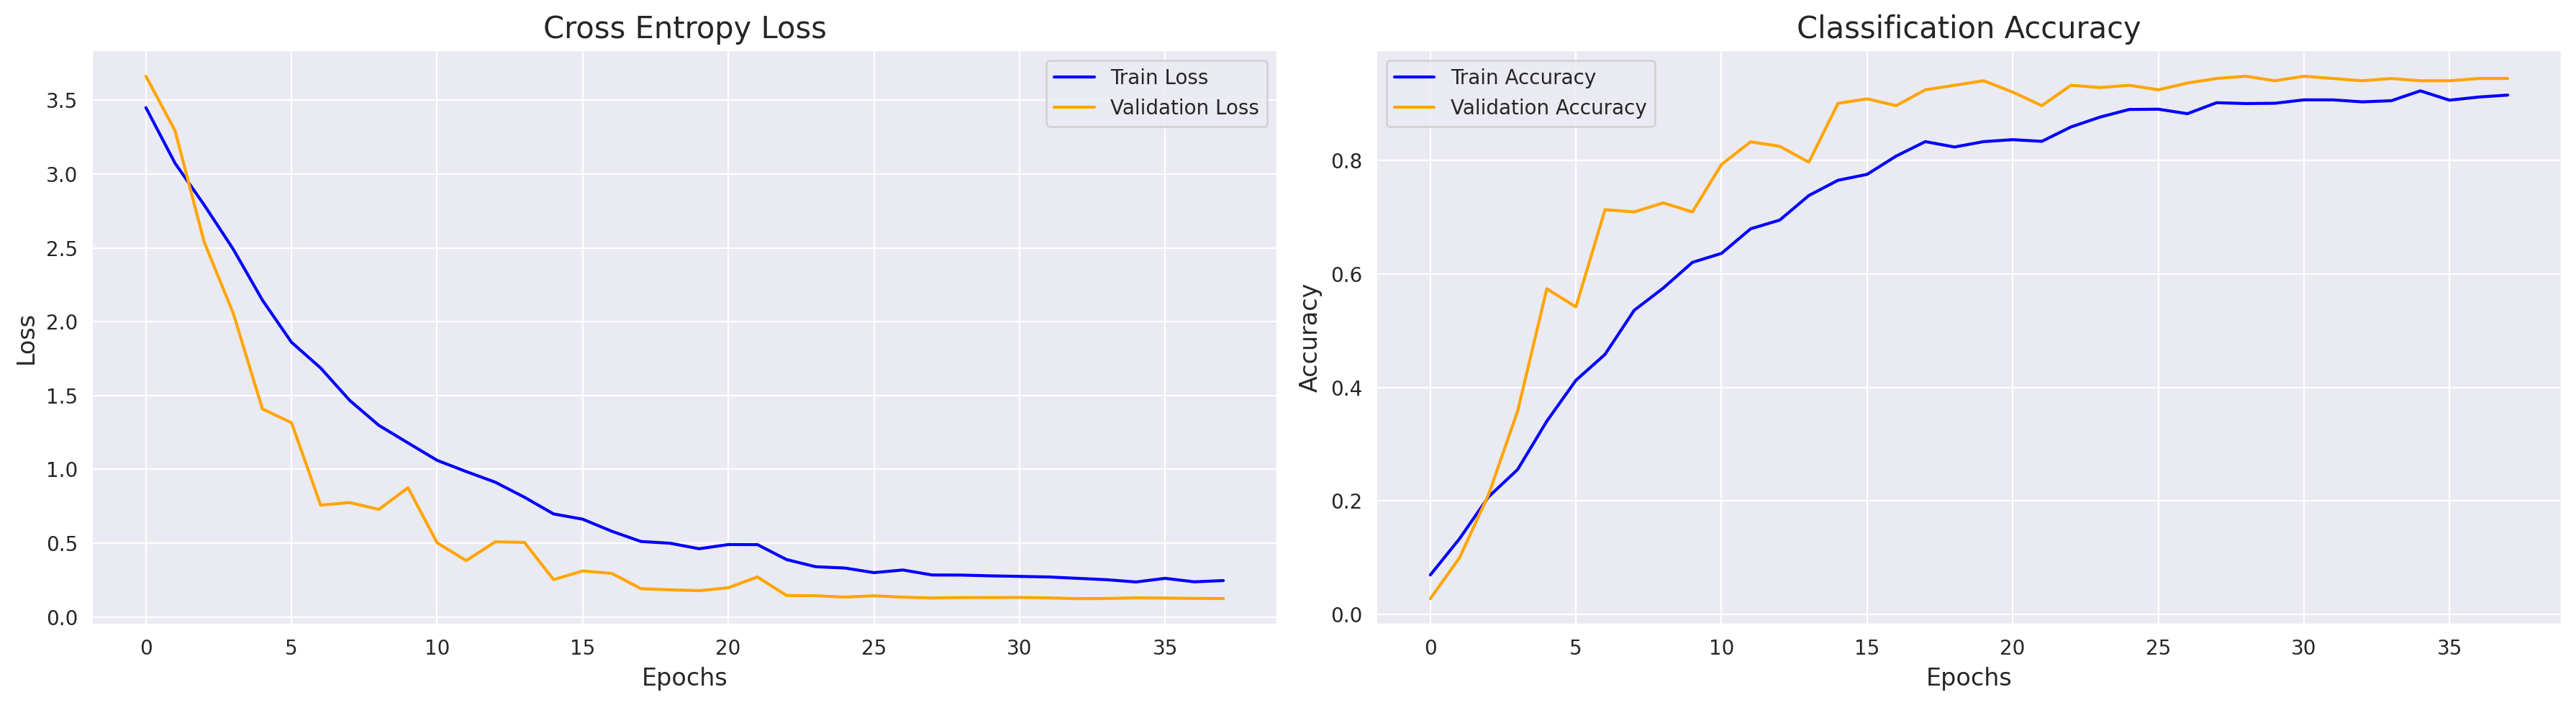

In [89]:
import matplotlib.pyplot as plt

# Conversion en DataFrame
history_data = pd.DataFrame(asl_class1.history)

# Configuration de la figure
plt.figure(figsize=(18, 5), dpi=200)

# Tracer la courbe de perte (Loss)
plt.subplot(121)
plt.title('Cross Entropy Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.plot(history_data['loss'], label='Train Loss', color='blue')
plt.plot(history_data['val_loss'], label='Validation Loss', color='orange')
plt.legend(fontsize=10)

# Tracer la courbe de précision (Accuracy)
plt.subplot(122)
plt.title('Classification Accuracy', fontsize=15)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.plot(history_data['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy', color='orange')
plt.legend(fontsize=10)

# Affichage des graphiques
plt.tight_layout()
plt.show()


In [91]:
model1.save('resnet50_model.h5')  # Sauvegarder le modèle


In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Charger le modèle sauvegardé
model = load_model(r"C:\Users\HP\Downloads\model1 (1).h5")

# Afficher un résumé du modèle pour vérifier qu'il a bien été chargé
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,404,102 (9.17 MB)

 Trainable params: 2,403,652 (9.17 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 2 (12.00 B)

In [10]:
# Charger le modèle sauvegardé
model = load_model(r'C:\Users\HP\Downloads\model1 (1).h5')

# Liste des classes (A-Z et 0-9)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

    
# Fonction pour prédire une image et afficher la classe prédite
def predict_image(image_path, model, img_size=(64, 64)):
    # Charger l'image
    img = load_img(image_path, target_size=img_size)
    
    # Convertir l'image en tableau numpy
    img_array = img_to_array(img) / 255.0  # Normalisation
    
    # Ajouter une dimension pour représenter le batch
    img_array = np.expand_dims(img_array, axis=0)
    
    # Effectuer la prédiction
    prediction = model.predict(img_array)
    
    # Obtenir l'indice de la classe prédite
    predicted_class_index = np.argmax(prediction, axis=1)
    print(predicted_class_index)
    # Récupérer le nom de la classe prédite
    predicted_class_name = class_names[predicted_class_index[0]]
    
    return predicted_class_name

# Chemin de l'image à tester
image_path = r"C:\Users\HP\Downloads\prédiction\test\0\0.jpeg"  # Remplacez par le chemin de votre image

# Prédire la classe de l'image
predicted_class = predict_image(image_path, model)

# Afficher la classe prédite
print(f"The predicted class for the image is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[0]
The predicted class for the image is: 0


In [11]:
# Charger le modèle sauvegardé
model = load_model(r'C:\Users\HP\Downloads\model1 (1).h5')

# Liste des classes (A-Z et 0-9)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

    
# Fonction pour prédire une image et afficher la classe prédite
def predict_image(image_path, model, img_size=(64, 64)):
    # Charger l'image
    img = load_img(image_path, target_size=img_size)
    
    # Convertir l'image en tableau numpy
    img_array = img_to_array(img) / 255.0  # Normalisation
    
    # Ajouter une dimension pour représenter le batch
    img_array = np.expand_dims(img_array, axis=0)
    
    # Effectuer la prédiction
    prediction = model.predict(img_array)
    
    # Obtenir l'indice de la classe prédite
    predicted_class_index = np.argmax(prediction, axis=1)
    print(predicted_class_index)
    # Récupérer le nom de la classe prédite
    predicted_class_name = class_names[predicted_class_index[0]]
    
    return predicted_class_name

# Chemin de l'image à tester
image_path = r"C:\Users\HP\Downloads\prédiction\test\a\a.jpeg"  # Remplacez par le chemin de votre image

# Prédire la classe de l'image
predicted_class = predict_image(image_path, model)

# Afficher la classe prédite
print(f"The predicted class for the image is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
[10]
The predicted class for the image is: A


In [13]:
# Charger le modèle sauvegardé
model = load_model(r'C:\Users\HP\Downloads\model1 (1).h5')

# Liste des classes (A-Z et 0-9)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9','A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

    
# Fonction pour prédire une image et afficher la classe prédite
def predict_image(image_path, model, img_size=(64, 64)):
    # Charger l'image
    img = load_img(image_path, target_size=img_size)
    
    # Convertir l'image en tableau numpy
    img_array = img_to_array(img) / 255.0  # Normalisation
    
    # Ajouter une dimension pour représenter le batch
    img_array = np.expand_dims(img_array, axis=0)
    
    # Effectuer la prédiction
    prediction = model.predict(img_array)
    
    # Obtenir l'indice de la classe prédite
    predicted_class_index = np.argmax(prediction, axis=1)
    print(predicted_class_index)
    # Récupérer le nom de la classe prédite
    predicted_class_name = class_names[predicted_class_index[0]]
    
    return predicted_class_name

# Chemin de l'image à tester
image_path = r"C:\Users\HP\Downloads\prédiction\test\b\b.jpeg"  # Remplacez par le chemin de votre image

# Prédire la classe de l'image
predicted_class = predict_image(image_path, model)

# Afficher la classe prédite
print(f"The predicted class for the image is: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 849ms/step
[11]
The predicted class for the image is: B
